In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(9, 6)})

In [3]:
events_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")
submissions_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")

In [4]:
submissions_data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/submission_data_test.csv")
events_data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/events_data_test.csv")

In [5]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [6]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [7]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data.date.dt.date

In [8]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [9]:
events_data_test['date'] = pd.to_datetime(events_data_test.timestamp, unit='s')
events_data_test['day'] = events_data_test.date.dt.date
events_data_test.head()

,step_id,timestamp,action,user_id,date,day
0,30456,1526893787,viewed,24417,2018-05-21 09:09:47,2018-05-21
1,30456,1526893797,viewed,24417,2018-05-21 09:09:57,2018-05-21
2,30456,1526893954,viewed,24417,2018-05-21 09:12:34,2018-05-21
3,30456,1526895780,viewed,24417,2018-05-21 09:43:00,2018-05-21
4,30456,1526893787,discovered,24417,2018-05-21 09:09:47,2018-05-21


In [10]:
submissions_data_test['date'] = pd.to_datetime(submissions_data_test.timestamp, unit='s')
submissions_data_test['day'] = submissions_data_test.date.dt.date
submissions_data_test.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1526800961,wrong,24370,2018-05-20 07:22:41,2018-05-20
1,31971,1526800976,wrong,24370,2018-05-20 07:22:56,2018-05-20
2,31971,1526800993,wrong,24370,2018-05-20 07:23:13,2018-05-20
3,31971,1526801054,correct,24370,2018-05-20 07:24:14,2018-05-20
4,31972,1526800664,wrong,24370,2018-05-20 07:17:44,2018-05-20


In [11]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

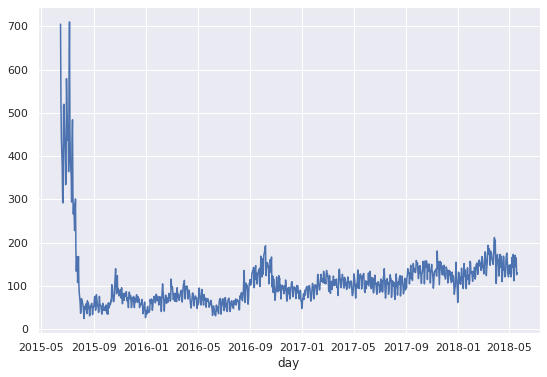

In [12]:
events_data.groupby('day').user_id.nunique().plot()

In [13]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [14]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [15]:
users_events_data_test = events_data_test.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

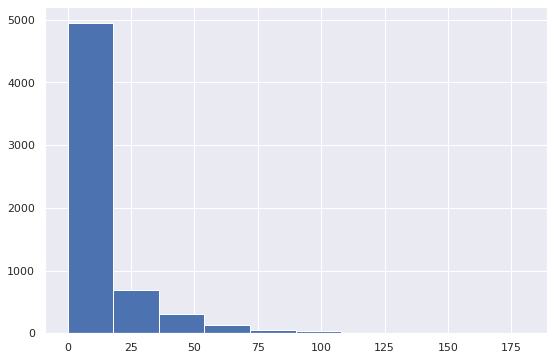

In [16]:
events_data_test.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().discovered.hist()

In [17]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [18]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [19]:
users_scores_test = submissions_data_test.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [20]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [21]:
users_scores_test.head()

submission_status,user_id,correct,wrong
0,12,1,0
1,13,29,36
2,15,10,30
3,21,24,103
4,35,7,35


In [22]:
users_events_data_test.head()

action,user_id,discovered,passed,started_attempt,viewed
0,4,1,1,0,1
1,6,1,1,0,1
2,10,2,2,0,6
3,12,11,9,4,14
4,13,70,70,35,105


In [23]:
#Разница в днях захода для кадого пользователя
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data = gap_data /(24 * 60 * 60)

In [24]:
gap_data.quantile(0.90)

18.325995370370403

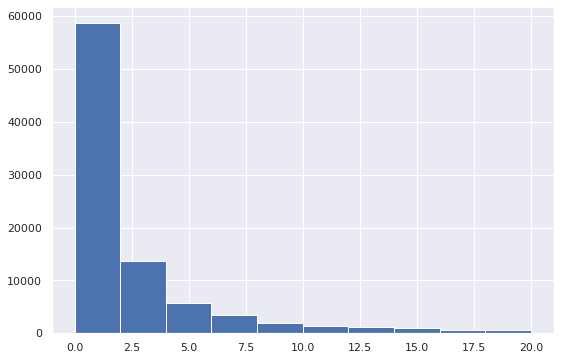

In [25]:
gap_data[gap_data<20].hist()

In [26]:
#пока выбираем 30 дней как время отсутствия = дроп с курса
#довольно плохой подход, нужно посмотреть по данным лучше
threshold = 30

In [27]:
users_data = events_data.groupby('user_id', as_index = False)\
    .agg({'timestamp':'max'}).rename(columns=({'timestamp':'last_timestamp'}))

In [28]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [29]:
now = 1526772811 #последяя дата в данных
drop_out_threshold = 30 * 24 * 60 * 60 #30 дней

In [30]:
#считаем, что пользователь дропнулся с курса, если он отсутствовал 30 дней с самой последней даты в данных
#очень хреново сделано, подумать о лучшем условии дропаута
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold 

In [31]:
#кол-во уникальных дней для каждого юзера
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [32]:
users_days_test = events_data_test.groupby('user_id').day.nunique().to_frame().reset_index()
users_days_test.head()

,user_id,day
0,4,1
1,6,1
2,10,1
3,12,1
4,13,2


In [33]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [34]:
users_scores_test.head()

submission_status,user_id,correct,wrong
0,12,1,0
1,13,29,36
2,15,10,30
3,21,24,103
4,35,7,35


In [35]:
users_events_data_test.head()

action,user_id,discovered,passed,started_attempt,viewed
0,4,1,1,0,1
1,6,1,1,0,1
2,10,2,2,0,6
3,12,11,9,4,14
4,13,70,70,35,105


In [36]:
users_data_test = users_events_data_test.merge(users_scores_test, how='outer', on='user_id')
users_data_test = users_data_test.merge(users_days_test, how='outer', on='user_id')
users_data_test = users_data_test.fillna(0)
users_data_test.head()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong,day
0,4,1,1,0,1,0.0,0.0,1
1,6,1,1,0,1,0.0,0.0,1
2,10,2,2,0,6,0.0,0.0,1
3,12,11,9,4,14,1.0,0.0,1
4,13,70,70,35,105,29.0,36.0,2


In [37]:
users_scores_test.head()

submission_status,user_id,correct,wrong
0,12,1,0
1,13,29,36
2,15,10,30
3,21,24,103
4,35,7,35


In [38]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [39]:
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [40]:
users_data = users_data.merge(users_events_data, how='outer',on='user_id')

In [41]:
users_data = users_data.merge(users_days, how='outer',on='user_id')

In [42]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [43]:
#проверяем, что данные не потеряны
users_data.user_id.nunique() == events_data.user_id.nunique()

True

In [44]:
users_data_test.user_id.nunique() == events_data_test.user_id.nunique()

True

In [45]:
#считаем, что пользователь прошёл курс, если прошёл 170 степов
users_data['passed_course'] = users_data.passed > 170

In [46]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [47]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [48]:
#посмотрим кол-во уникальных дней для отдельых пользователей
users_data[users_data.passed_course].day.median()

20.0

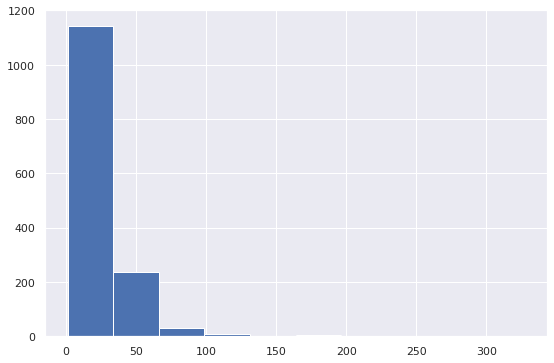

In [49]:
users_data[users_data.passed_course].day.hist()
#выбираем 3 первых дня юзера

In [50]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [51]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp':'min'})\
.rename({'timestamp':'min_timestamp'}, axis=1)

In [52]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [53]:
users_data = users_data.merge(user_min_time, how='outer')

In [54]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [55]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [56]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [57]:
learning_time_threshold = 3 * 24 * 60 * 60

In [58]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + \
(user_min_time.min_timestamp + learning_time_threshold).map(str)

In [59]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [60]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how = 'outer')

In [61]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [62]:
events_data.shape

(3480703, 8)

In [63]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [64]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [66]:
events_data_train.groupby('user_id').day.nunique().max()
#не больше 4 уникальных дней укладывается в интервал 3 суток

4

In [67]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [68]:
#подготовка фичей к МЛ
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().\
rename(columns={'day':'days'})

In [69]:
X1_test = submissions_data_test.groupby('user_id').day.nunique().to_frame().reset_index().\
rename(columns={'day':'days'})

In [70]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [71]:
X1_test.head()

,user_id,days
0,12,1
1,13,2
2,15,3
3,21,1
4,35,3


In [72]:
X.shape

(8913, 2)

In [73]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().\
reset_index().rename(columns={'step_id':'steps_tried'})

In [74]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [75]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [76]:
steps_tried_test = submissions_data_test.groupby('user_id').step_id.nunique().to_frame().\
reset_index().rename(columns={'step_id':'steps_tried'})
X1_test = X1_test.merge(steps_tried_test, on='user_id', how='outer')
X1_test.head()

,user_id,days,steps_tried
0,12,1,1
1,13,2,29
2,15,3,11
3,21,1,30
4,35,3,9


In [77]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [78]:
X.shape

(8913, 3)

In [79]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index())

In [80]:
X1_test = X1_test.merge(submissions_data_test.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index())

In [81]:
X1_test.head()

,user_id,days,steps_tried,correct,wrong
0,12,1,1,1,0
1,13,2,29,29,36
2,15,3,11,10,30
3,21,1,30,24,103
4,35,3,9,7,35


In [82]:
X1_test.shape

(2803, 5)

In [83]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [84]:
X.shape

(8913, 5)

In [85]:
X1_test['correct_ratio'] = X1_test.correct/(X1_test.correct + X1_test.wrong)

In [86]:
X['correct_ratio'] = X.correct/(X.correct + X.wrong)

In [87]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [88]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [89]:
X1_test = X1_test.merge(events_data_test.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [90]:
X1_test.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,12,1.0,1.0,1.0,0.0,1.000000,14
1,13,2.0,29.0,29.0,36.0,0.446154,105
2,15,3.0,11.0,10.0,30.0,0.250000,1
3,21,1.0,30.0,24.0,103.0,0.188976,98
4,35,3.0,9.0,7.0,35.0,0.166667,70


In [91]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [92]:
X.shape

(19234, 7)

In [93]:
X = X.fillna(0)

In [94]:
X1_test = X1_test.fillna(0)

In [95]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [96]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [97]:
#убираем тех, кто ещё не прошёл курс и не записан, как gone_user
X = X[~((~ X.is_gone_user) & (~ X.passed_course))]

In [98]:
X.groupby(['passed_course','is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [99]:
X.to_csv('X_data.csv')

In [100]:
X1_test.to_csv('X_data_test.csv')

In [101]:
X = pd.read_csv('X_data.csv')
X1 = pd.read_csv('X_data_test.csv')

In [102]:
X.head()

,Unnamed: 0,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [103]:
X1.head()

,Unnamed: 0,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,0,12,1.0,1.0,1.0,0.0,1.000000,14
1,1,13,2.0,29.0,29.0,36.0,0.446154,105
2,2,15,3.0,11.0,10.0,30.0,0.250000,1
3,3,21,1.0,30.0,24.0,103.0,0.188976,98
4,4,35,3.0,9.0,7.0,35.0,0.166667,70


In [104]:
X.drop('Unnamed: 0', axis=1, inplace=True)
X1.drop('Unnamed: 0', axis=1, inplace=True)

In [105]:
X.shape

(17985, 9)

In [106]:
#поработать с выбросами
#сделать плоие вещи с дисбалансом классов - DONE

In [107]:
X.describe()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
count,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000
mean,13373.076897,0.697971,3.614735,3.582041,3.370809,0.327681,21.642647
std,7750.302330,0.937355,7.295497,7.311888,10.846993,0.403274,37.151574
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,20078.000000,1.000000,3.000000,3.000000,1.000000,0.672131,25.000000
max,26798.000000,4.000000,76.000000,76.000000,444.000000,1.000000,612.000000


In [108]:
#X.drop(X[X.viewed>=450].index, axis=0, inplace = True)
#X[X.viewed>400]

In [109]:
y = X.passed_course.map(int)
X.drop(['passed_course','is_gone_user'], axis=1, inplace=True)

In [110]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: passed_course, dtype: int64

In [111]:
X = X.set_index(X.user_id)
X.drop('user_id', axis=1, inplace=True)
X1 = X1.set_index(X1.user_id)
X1.drop('user_id', axis=1, inplace=True)

In [112]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [113]:
X1.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
12,1.0,1.0,1.0,0.0,1.000000,14
13,2.0,29.0,29.0,36.0,0.446154,105
15,3.0,11.0,10.0,30.0,0.250000,1
21,1.0,30.0,24.0,103.0,0.188976,98
35,3.0,9.0,7.0,35.0,0.166667,70


In [114]:
sum(y)/len(y)

0.07923269391159299

In [115]:
#"feature-engineering"
X_less = X.drop(['correct_ratio'], axis=1)

In [116]:
X_less.head()

,days,steps_tried,correct,wrong,viewed
user_id,,,,,
2,1.0,2.0,2.0,0.0,9
3,1.0,4.0,4.0,4.0,20
8,1.0,11.0,9.0,21.0,154
14,1.0,1.0,0.0,1.0,9
16,3.0,23.0,23.0,27.0,132


In [117]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [118]:
#здесь можно начать обучать модель
#стоит всё-таки нормально сделать предобработку
#можно построить Learning curve - точность, полноту и т.д. по кол-ву объектов классов
#!отобрать меньше фичей, использовать их линкомб 
#!попробовать опорные вектора, перцептрон, наивбайес
#!!сделать адерсемплинг!! - DONE
#построить также PRC-AUC на несбалансированных выборках - всё очень плохо - SOLVED

In [119]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
#X_train, X_test, y_train, y_test = train_test_split(X_less,y,test_size=0.33)#working with less features
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.33)

In [120]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
LR = LogisticRegression(solver='lbfgs', class_weight='balanced').fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
f1_score(y_test, LR_predictions)

0.786610878661088

In [121]:
recall_score(y_test, LR_predictions)

0.7882599580712788

In [122]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_curve(fitted_classifier, flag='ROC', X_test=X_test, y_test=y_test, y=y_resampled):
    """plot ROC by default, or PRC, if stated in flag,
       to already fitted classification algorithm
    """
    if flag == 'PRC':
        no_skill = len(y[y==1]) / len(y)
        plt.plot([0, 1], [no_skill, no_skill],  color='navy', linestyle='--', label='No Skill')
        precision, recall, thresholds = precision_recall_curve(y_test, fitted_classifier.predict_proba(X_test)[:, 1])
        auc_prc_score = auc(recall, precision)

        plt.plot(recall, precision, color='darkorange', label = 'PRC curve(area = %0.2f)'% auc_prc_score)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.show()
    else:
        fpr, tpr, thresholds = roc_curve(y_test, fitted_classifier.predict_proba(X_test)[:, 1])
        roc_auc= auc(fpr, tpr)
        

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

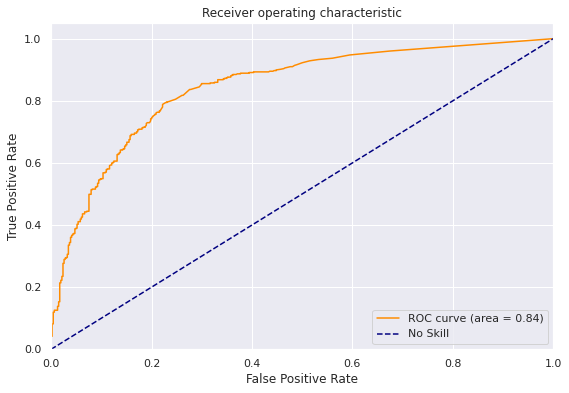

In [123]:
plot_curve(LR)

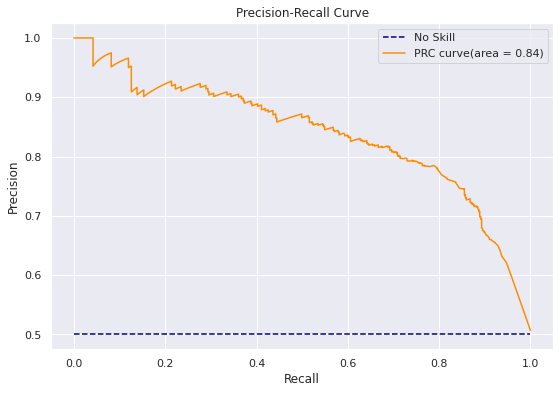

In [124]:
plot_curve(LR, "PRC")

In [125]:
sum(y_test)/len(y_test)

0.5069075451647184

In [126]:
sum(LR_predictions)/len(LR_predictions)

0.5090329436769394

In [127]:
LR_predictions1 = LR.predict_proba(X1)

In [128]:
df1 = pd.DataFrame(data = {'is_gone': LR_predictions1[:, 1]})
df1 = df1.set_index(X1.index)
df1.head()

,is_gone
user_id,
12,0.486369
13,0.916262
15,0.630544
21,0.865784
35,0.715999


In [129]:
df1.to_csv('predictions_logistic_regression.csv')

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
parameters = {'criterion':['entropy', 'gini'],
              'max_depth': range(3,10), 
              'max_leaf_nodes':range(2,15), 
              'min_samples_leaf': range(1,4),
              'min_samples_split':range(2,5)}

grid_search_cv_dt= GridSearchCV(dt, parameters, cv=5, n_jobs=-1, scoring='f1')
grid_search_cv_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [132]:
grid_search_cv_dt.best_score_

0.7650683747723307

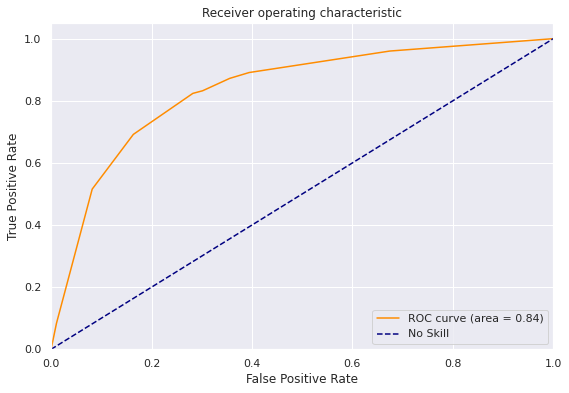

In [133]:
plot_curve(grid_search_cv_dt.best_estimator_)

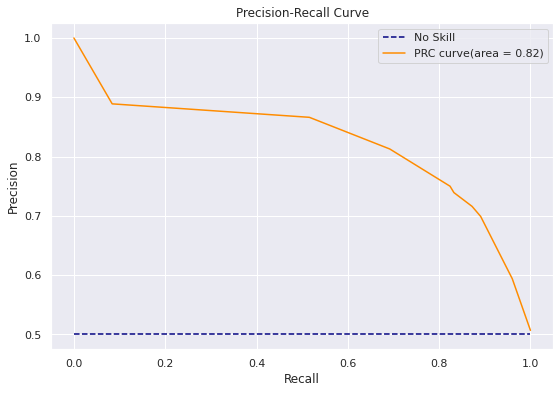

In [134]:
plot_curve(grid_search_cv_dt.best_estimator_, 'PRC')

In [135]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators': [50, 100, 200, 500],
             'max_depth': range(3, 15)}

grid_search_cv_rf = GridSearchCV(rf, parameters, scoring='f1', n_jobs=-1, cv=5)
grid_search_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [136]:
grid_search_cv_rf.best_score_

0.7684036068384386

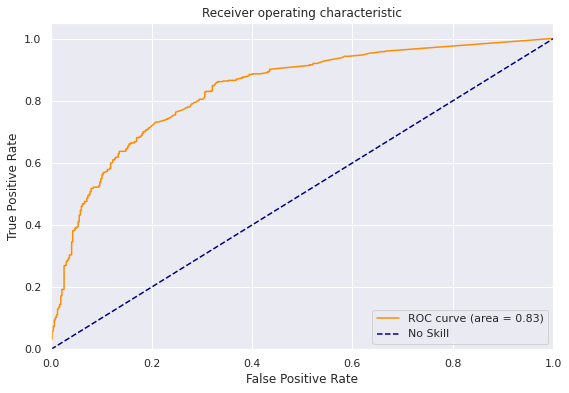

In [137]:
plot_curve(grid_search_cv_rf.best_estimator_)

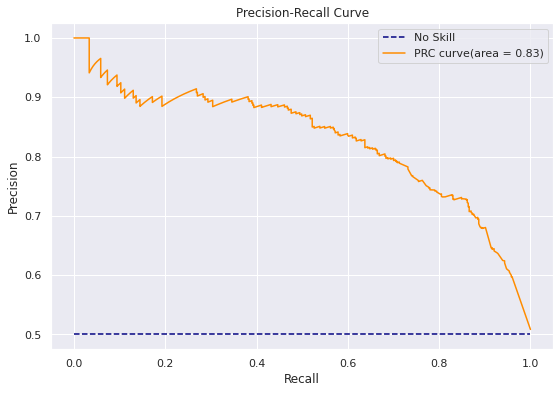

In [138]:
plot_curve(grid_search_cv_rf.best_estimator_, 'PRC')